In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as pltpatch
import seaborn as sns
import scipy.stats as st
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn import datasets

In [44]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [3]:
df=pd.read_csv(r"Train.csv",sep=',')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [4]:
# Rename column
df = df.rename(columns={'Warehouse_block':'Warehouse','Mode_of_Shipment':'Shipment','Customer_care_calls':'Calls',
                        'Customer_rating':'Rating','Cost_of_the_Product':'Cost','Product_importance':'Importance',
                        'Discount_offered':'Discount','Weight_in_gms':'Weight_gram','Reached.on.Time_Y.N':'Late'})
df.head(10)

,ID,Warehouse,Shipment,Calls,Rating,Cost,Prior_purchases,Importance,Gender,Discount,Weight_gram,Late
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
5,6,F,Flight,3,1,162,3,medium,F,12,1417,1
6,7,D,Flight,3,4,250,3,low,F,3,2371,1
7,8,F,Flight,4,1,233,2,low,F,48,2804,1
8,9,A,Flight,3,4,150,3,low,F,11,1861,1
9,10,B,Flight,3,2,164,3,medium,F,29,1187,1


In [5]:
df.describe()

,ID,Calls,Rating,Cost,Prior_purchases,Discount,Weight_gram,Late
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [6]:
#Check duplicate data
df.isna().sum() #there are no null value found

ID                 0
Warehouse          0
Shipment           0
Calls              0
Rating             0
Cost               0
Prior_purchases    0
Importance         0
Gender             0
Discount           0
Weight_gram        0
Late               0
dtype: int64

In [5]:
#since late =1, check how many total late in the data set to determine percentage of late
df['Late'].sum()

6563

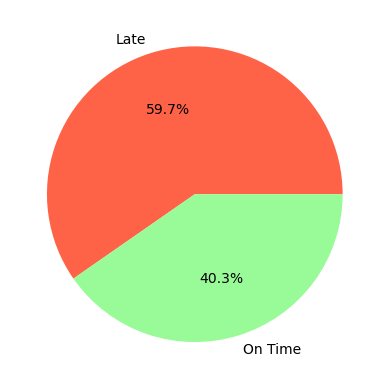

In [7]:
#plotting piechart

#creating the data for pie chart
total_late=df['Late'].sum()
total_on_time= df['Late'].value_counts().sum()-total_late

#draw the pie chart
late_pie=np.array([total_late,total_on_time])
plt.pie(late_pie,labels=['Late','On Time'],colors=['tomato','palegreen'],autopct='%1.1f%%')
plt.show()

From the graphic above, we got that the late delivery amount is higher (59.7%) than on-time delivery.

<b> Checking Boxplot and Data Distribution

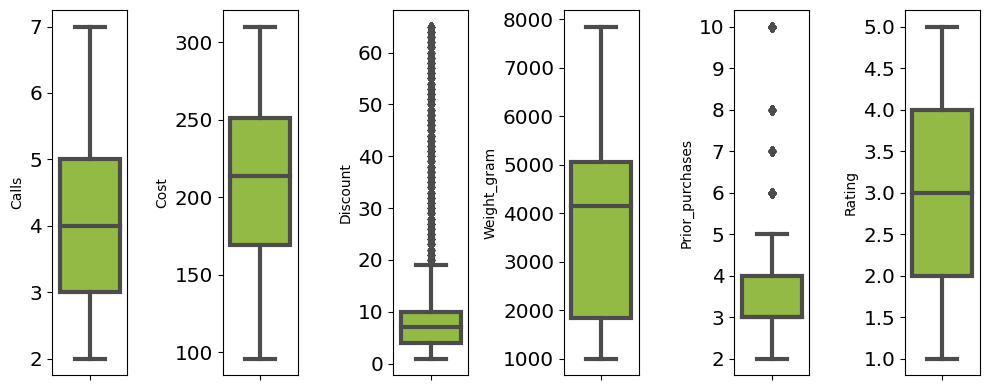

In [11]:
# check boxplot on numerical variables

plt.figure(figsize=(10,4))
for i in range(0, len(['Calls','Cost','Discount','Weight_gram','Prior_purchases','Rating'])):
    plt.subplot(1, len(['Calls','Cost','Discount','Weight_gram','Prior_purchases','Rating']), i+1)
    sns.boxplot(y=df[['Calls','Cost','Discount','Weight_gram','Prior_purchases','Rating'][i]], color='yellowgreen', orient='v')
    plt.tight_layout()

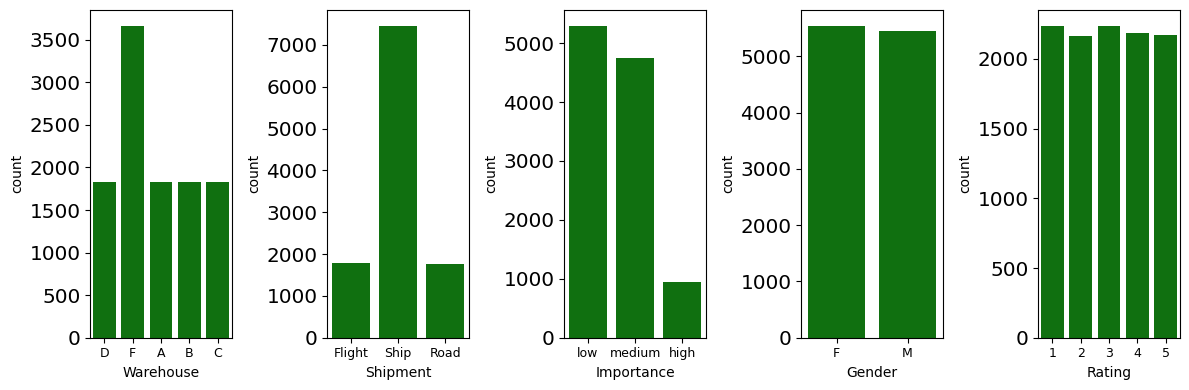

In [41]:
# Check countplot on Categorical variable individually

for i in range (0, len(['Warehouse','Shipment','Importance','Gender','Rating'])):
    plt.subplot(1, 5, i+1)
    sns.countplot(x=df[['Warehouse','Shipment','Importance','Gender','Rating'][i]], color='green')
    plt.xticks(fontsize=9)
    plt.tight_layout()

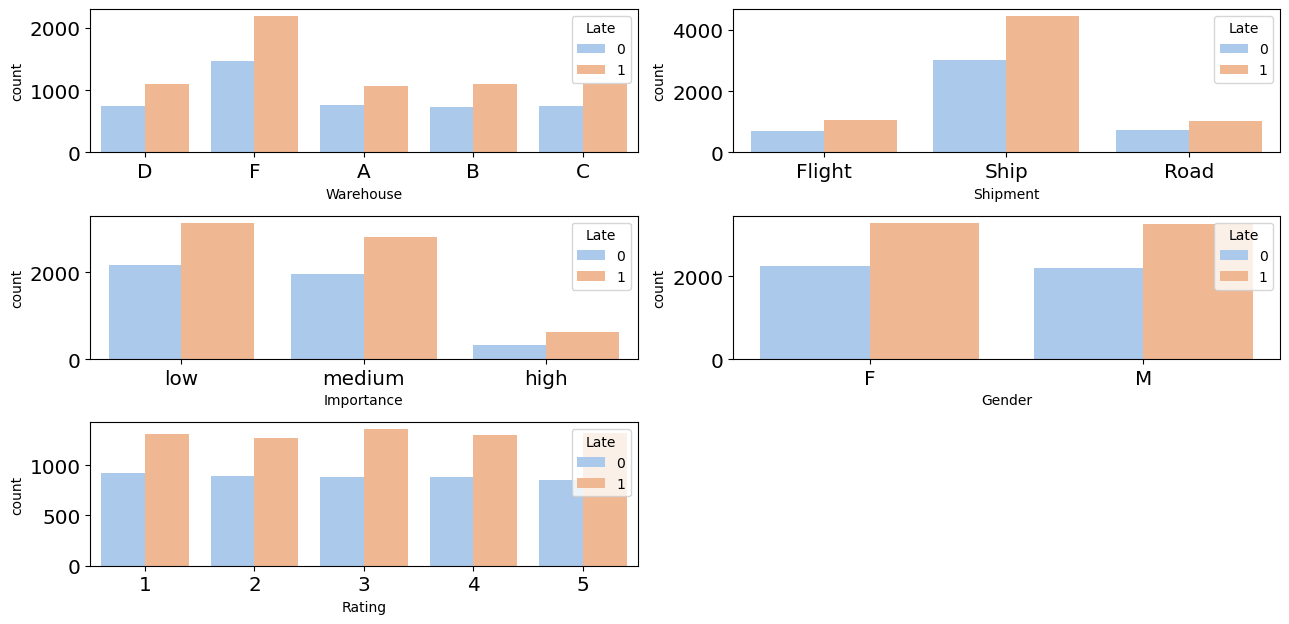

In [12]:
# Check countplot on Categorical variable compared to late shipment

plt.figure(figsize=(13,10))
for i in range(0, len(['Warehouse','Shipment','Importance','Gender','Rating'])):
    plt.subplot(5, 2, i+1)
    sns.countplot(x = df[['Warehouse','Shipment','Importance','Gender','Rating'][i]], orient='v', hue=df['Late'],palette='pastel')    
    plt.tight_layout()

From the boxplot and countplot we can see that: <br> 
a. There seems to be outlier in discount and prior_purchase data <br>
b. Warehouse F is most often used.<br>
c. Favorite shipment method chosen are via Ship. <br>
d. In terms of product importance, low-importance product amounts are the highest, followed by medium and high respectively.

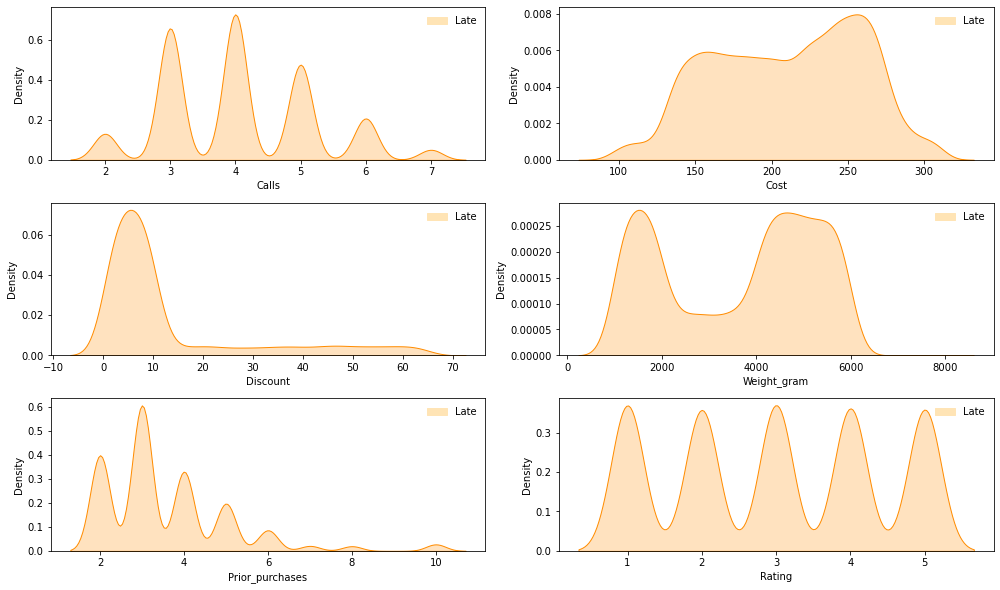

In [10]:
# create distribution of several variable on late hue

Latefig = df[df['Late']>0]
plt.figure(figsize=(14,16))
for i in range(0, len(['Calls','Cost','Discount','Weight_gram','Prior_purchases','Rating'])):
    plt.subplot(6,2, i+1)
    sns.kdeplot(data=Latefig, x=df[['Calls','Cost','Discount','Weight_gram','Prior_purchases','Rating'][i]], color='darkorange', fill='True')
    Orange_patch = pltpatch.Patch(color='moccasin', label='Late')
    plt.legend(handles=[Orange_patch], frameon=False, loc=1)
    plt.tight_layout()

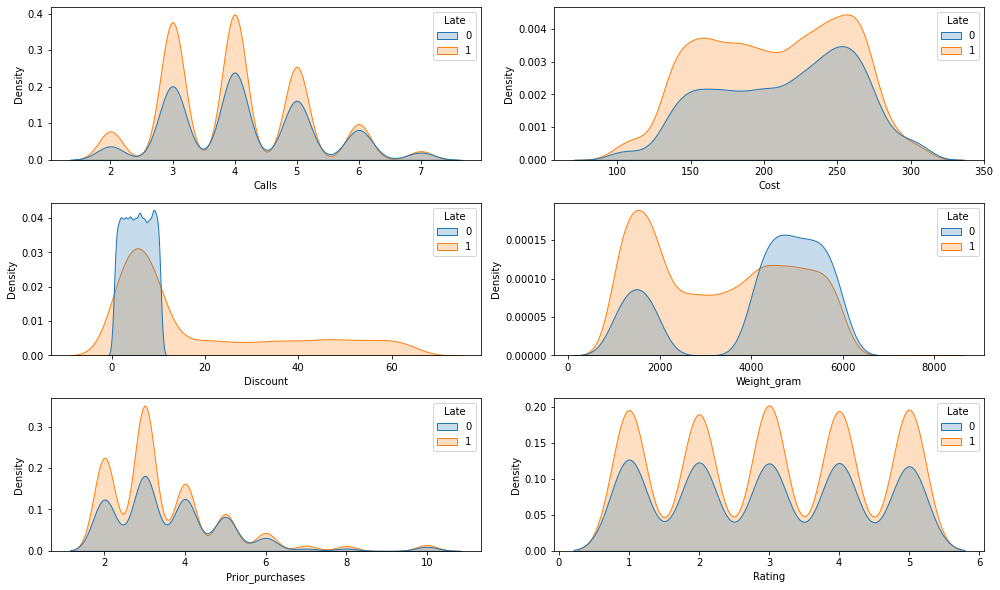

In [9]:
# check distribution plot for numerical variable

plt.figure(figsize=(14,16))
for i in range(0, len(['Calls','Cost','Discount','Weight_gram','Prior_purchases','Rating'])):
    plt.subplot(6,2, i+1)
    sns.kdeplot(data=df, x=df[['Calls','Cost','Discount','Weight_gram','Prior_purchases','Rating'][i]], hue='Late', fill='True')
    plt.tight_layout()


From the distribution plots above, we can see that: <br>
a. Discount distribution we can see that, product with small discount, shows better on-time. it also shows Discount is somewhat positively skewed <br>
b. Weight_gram distribution also shows that products with weight within certain range shows tend better on-time delivery (0<=weight<= 4kg)<br>
c. Prior_purchase distribution also shows that customer with high prior purchases count are less likely to have late delivery. it also shows Prior_purchases is somewhat positively skewed <br>
d. Rating distribution shows that there are probably late delivery on each rating score, which might suggest rating have no relation with late delivery

In [11]:
# Calculate skewness of each numerical variable
df[['Calls','Cost','Discount','Weight_gram','Prior_purchases','Rating']].skew(axis=0, skipna=True)

Calls              0.391926
Cost              -0.157117
Discount           1.798929
Weight_gram       -0.249747
Prior_purchases    1.681897
Rating             0.004360
dtype: float64

Discount and Prior_purchases show a positively skewed distribution.

<b>Pair Plot<b>

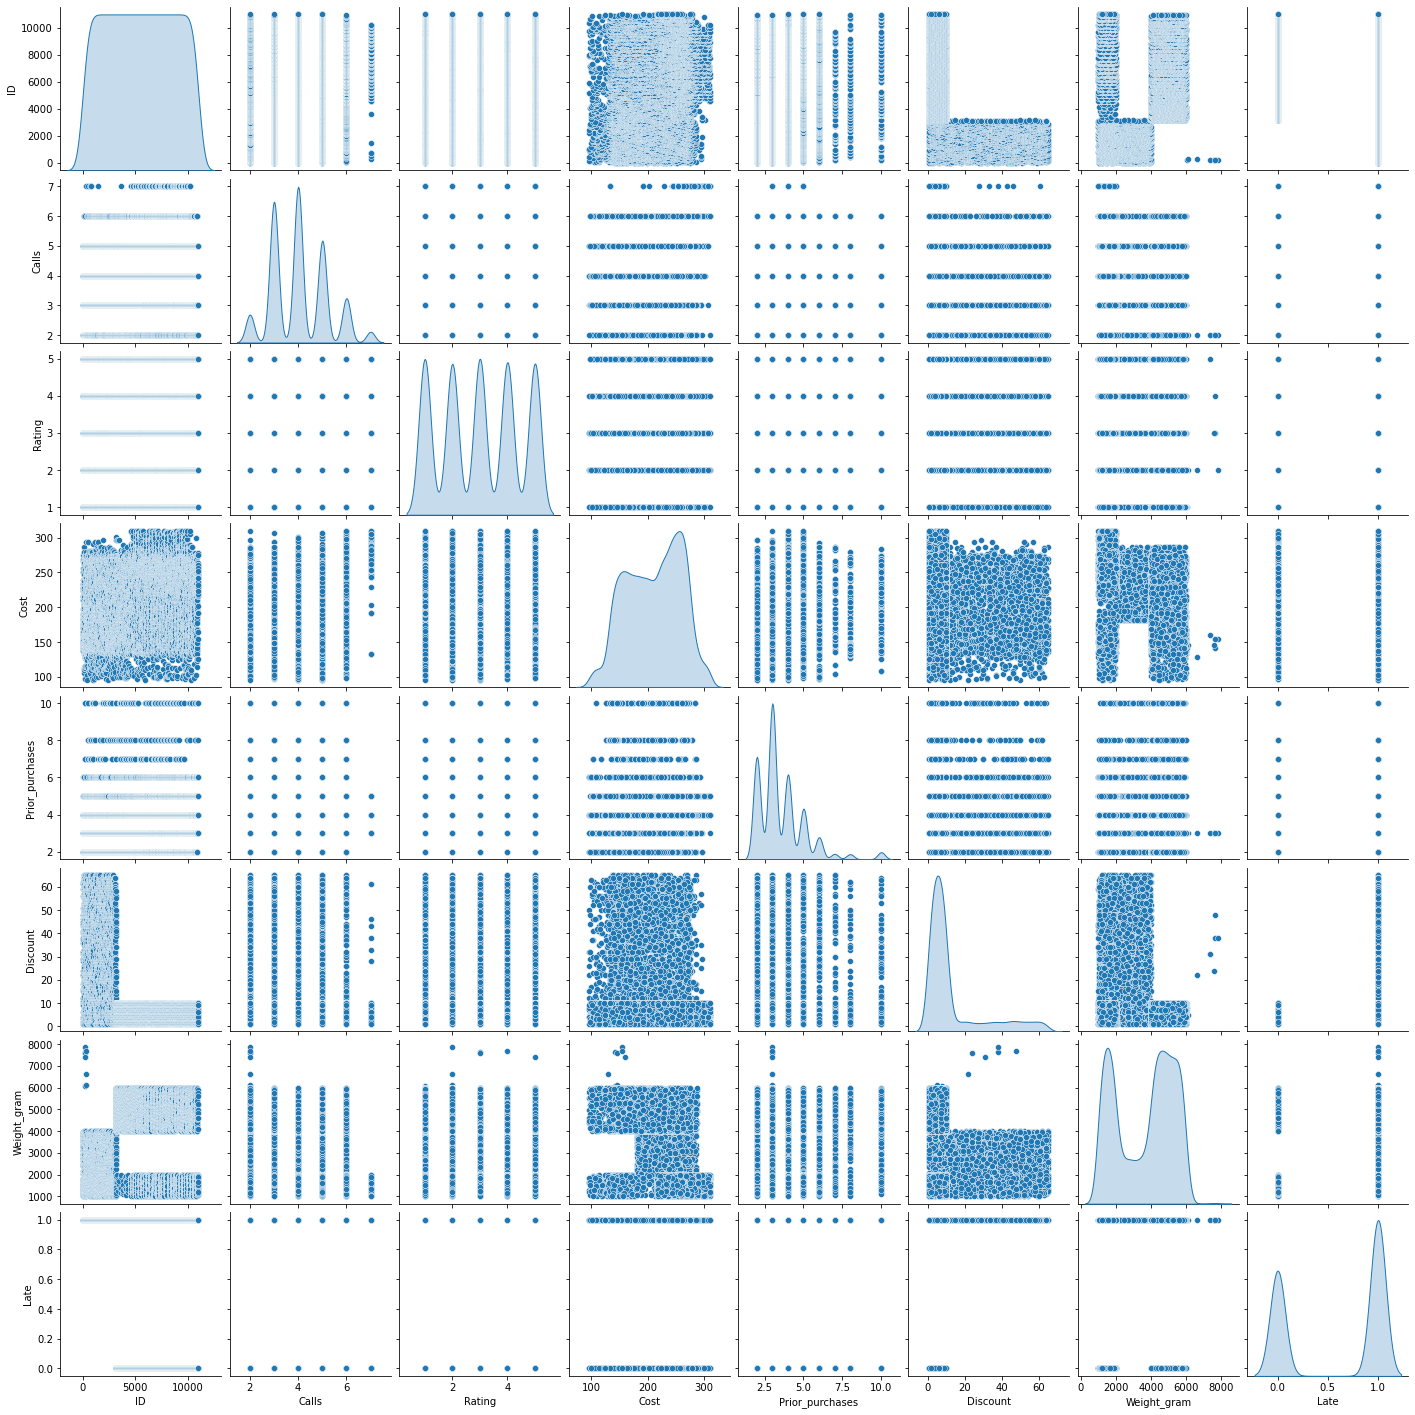

In [12]:
#Create Pair Plot
sns.pairplot(df,diag_kind='kde')

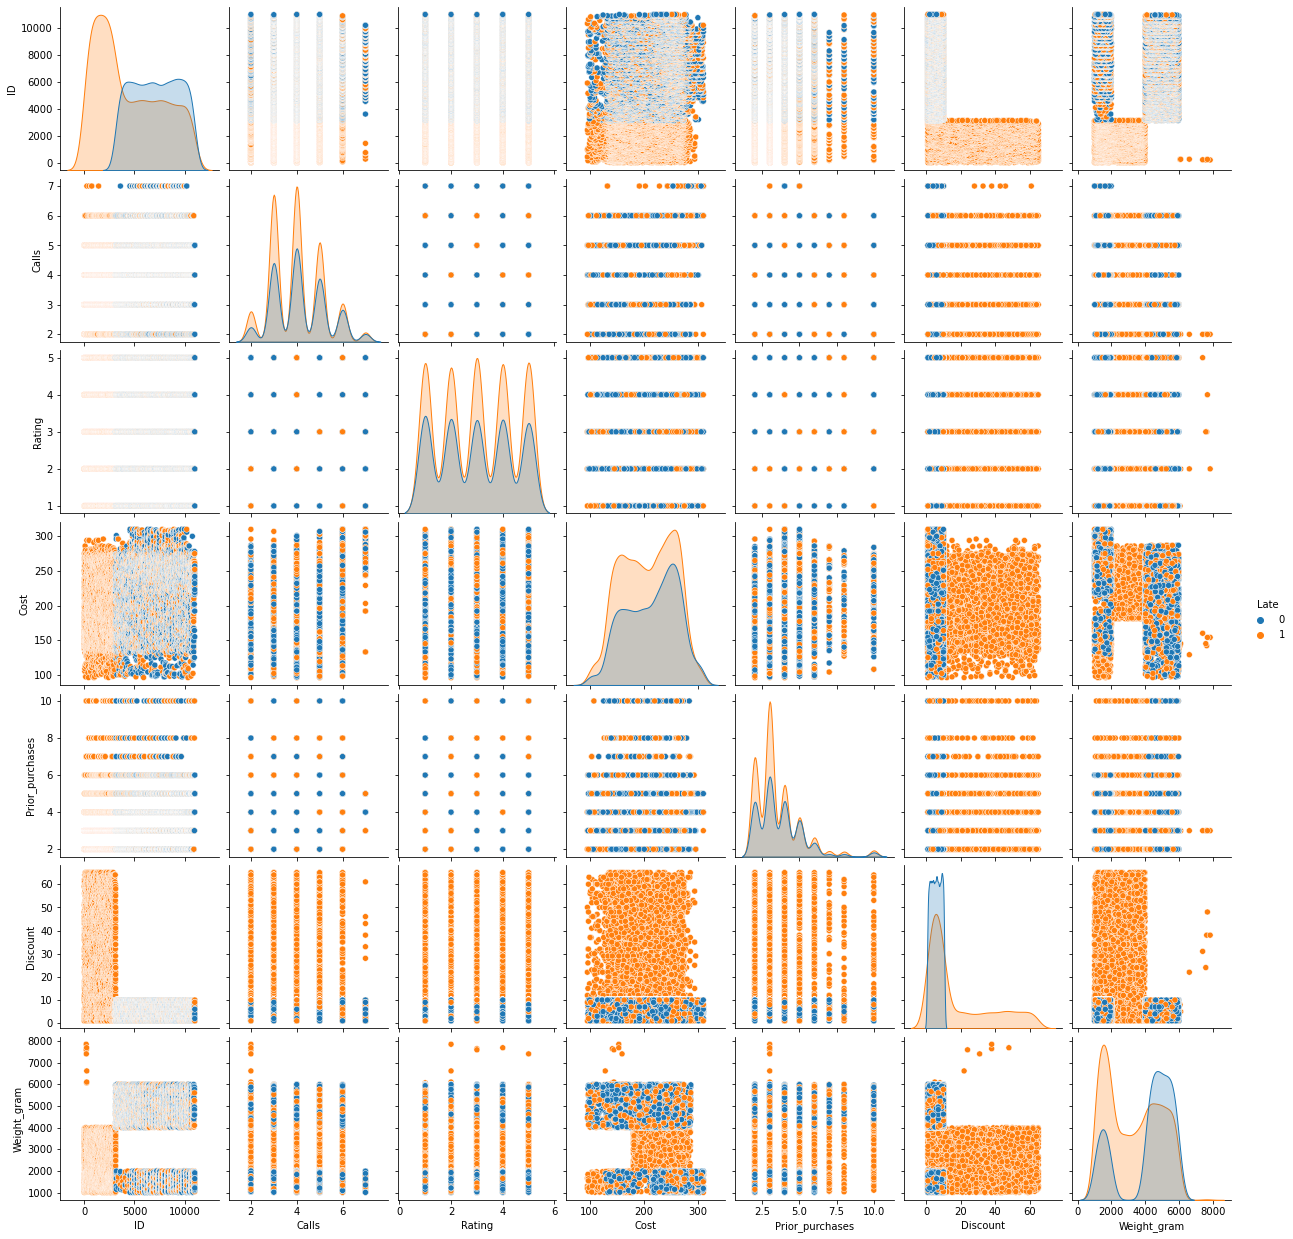

In [13]:
#Create Pair Plot with Hue Rating
sns.pairplot(df,diag_kind='kde',hue='Late')

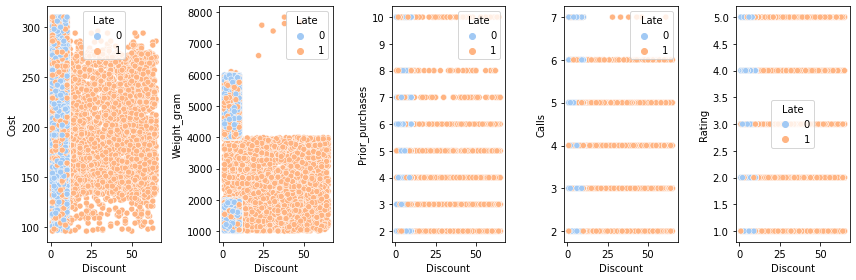

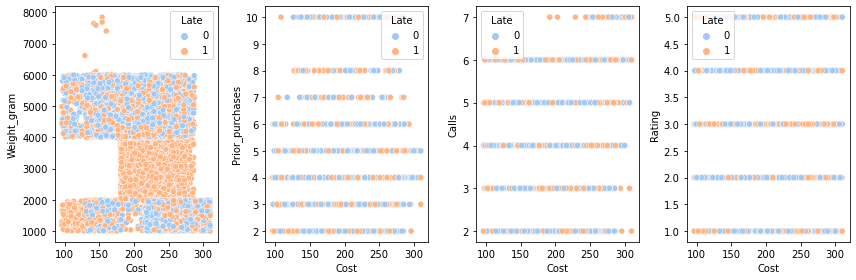

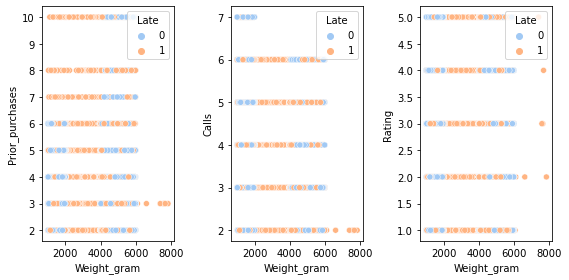

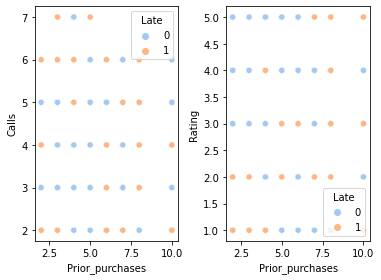

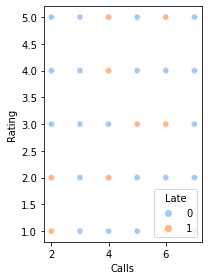

In [14]:
# plot Discount feature against other numeric feature
f1 = ['Cost','Weight_gram', 'Prior_purchases', 'Calls','Rating']
fig = plt.figure(figsize=(12, 4))
for i in range(0, len(f1)): 
    ax = fig.add_subplot(1, 5, i+1) 
    sns.scatterplot(ax=ax, data=df, x='Discount', y=f1[i], hue='Late', palette='pastel')
    plt.tight_layout() 
    
# plot cost feature against other numeric feature
f2 = ['Weight_gram', 'Prior_purchases', 'Calls','Rating']
fig = plt.figure(figsize=(12, 4))
for i in range(0, len(f2)): 
    ax = fig.add_subplot(1, 4, i+1) 
    sns.scatterplot(ax=ax, data=df, x='Cost', y=f2[i], hue='Late', palette='pastel')
    plt.tight_layout() 


# plot weight feature against other numeric feature
f3 = [ 'Prior_purchases', 'Calls','Rating']
fig = plt.figure(figsize=(8, 4))
for i in range(0, len(f3)): 
    ax = fig.add_subplot(1, 3, i+1) 
    sns.scatterplot(ax=ax, data=df, x='Weight_gram', y=f3[i], hue='Late', palette='pastel')
    plt.tight_layout() 

# plot Prior_purchases feature against other numeric feature
f3 = [ 'Calls','Rating']
fig = plt.figure(figsize=(8, 4))
for i in range(0, len(f3)): 
    ax = fig.add_subplot(1, 3, i+1) 
    sns.scatterplot(ax=ax, data=df, x='Prior_purchases', y=f3[i], hue='Late', palette='pastel')
    plt.tight_layout() 

# plot Prior_purchases feature against calls
fig = plt.figure(figsize=(3, 4))
sns.scatterplot(data=df, x='Calls', y='Rating', hue='Late', palette='pastel')
plt.tight_layout() 

Observation: <br>
a. In cost against discount plot, cluster of on-time delivery are formed in discount <20% <br>
b. In weight_gram against discount plot, 2 cluster is formed for on-time delivery. which located in low discount and 1000<=weight<=2000, and 4000<=weight<=6000 <br>
c. In cost against discount plot, it's observed that for discount <25%, the higher the calls the less the late, this hypothesis require further testing. <br>
d. similary in weight_gram against discount cost plot further strengthen that; there are cluster for weight_gram between 1000<=weight<=2000, and 4000<=weight<=6000.

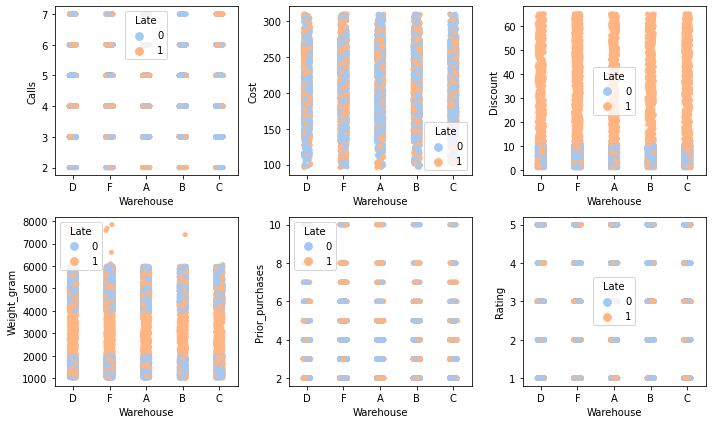

In [15]:
# category plot warehouse feature against other numerical feature (Cost, Discount, Weight_gram, Calls, Prior_purchases, and Rating)

fig = plt.figure(figsize=(10, 6))
for i in range(0, len(['Calls','Cost','Discount','Weight_gram','Prior_purchases','Rating'])): 
    ax = fig.add_subplot(2, 3, i+1) 
    sns.stripplot(ax=ax, data=df, x='Warehouse', 
                  y=['Calls','Cost','Discount','Weight_gram','Prior_purchases','Rating'][i], hue='Late', palette='pastel')
    plt.tight_layout() 

Observation: <br>
a. categorical plot shows consistent pattern of product with weight range of 1000<=weight<=2000, and 4000<=weight<=6000 accross several warehouse continue to be delivered on time. <br>
b. This consistent pattern also could be observed in discounts against warehouse, where the lower discounsts form cluster of on-time delivery for discount <=10%

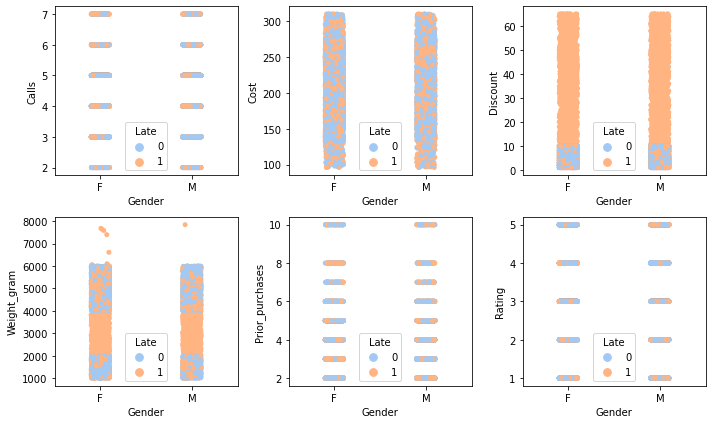

In [16]:
# category plot Gender feature against other numerical feature (Cost, Discount, Weight_gram, Calls, Prior_purchases, and Rating)

fig = plt.figure(figsize=(10, 6))
for i in range(0, len(['Calls','Cost','Discount','Weight_gram','Prior_purchases','Rating'])): 
    ax = fig.add_subplot(2, 3, i+1) 
    sns.stripplot(ax=ax, data=df, x='Gender', 
                  y=['Calls','Cost','Discount','Weight_gram','Prior_purchases','Rating'][i], hue='Late', palette='pastel')
    plt.tight_layout() 

Observation: <br>
Still consistent with previous categorical feature plot, gender seems to not plat important roles in determining on-time delivery.

Based on observation made from boxplot, data distribution, pair plot, numerical, and categorical plot. It shows that there are consistent pattern where transcation with weight_gram ranging ftom 1000<=weight<=2000, and 4000<=weight<=6000; transaction with discount <10%; and transaction with calls >=2 shows better on-time delivery. This observation would need to be tested further with corelation and hypthesis test.

<b>Correlation & Initial Hypothesis Test

<AxesSubplot:>

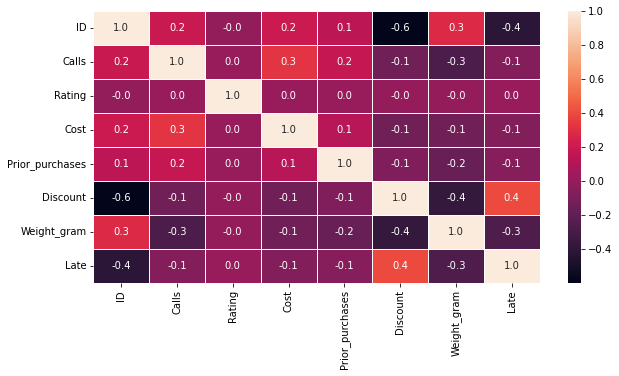

In [40]:
#create heat map for Pearson's correlation
heatmap_correlation,ax=plt.subplots(figsize = (10,5))
sns.heatmap(df.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)

Observation: <br>
From Pearson's Correlation it is found that there are several variable that are correlated although quite low (0.2-0.4). <br>
Team decide to remove feature below 0.2 Correlation to reduce the feature number.

a. The amount of discount offered on an item has the highest correlation with the late of delivery (correlation value 0.4). <br>
b. The amount of discount given to a product has a correlation with the weight of the goods (in grams) with a correlation value of -0.38 <br>
c. Customer care calls have a correlation with a cost of the product value of 0.32 <br>
d. Customer care calls have a correlation with the weight of goods (in grams) of -0.28 <br>
e. The weight of products sent has a negative correlation with the timeliness of delivery with a value of -0.27 <br>
f. In addition, the correlation value obtained among the other variable mentioned above are below 0.2 (between 0.2 and -0.2)

<b>LDA (Linear Discriminant Analysis) unfinished

In [18]:
#define predictor and response variables
X = df[['Calls','Cost','Discount','Weight_gram','Prior_purchases','Rating']]
y = df['Late']

#Fit the LDA model
model = LinearDiscriminantAnalysis()
model.fit(X, y)

LinearDiscriminantAnalysis()

In [19]:
#Define method to evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)

#evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores))   

0.6495687484490033


<b>Hypothesis Test

Based on previous observation and plot of several feature. several hypothesis would be tested. <br>
At first we hypothise that rating have correlation with calls. However based on the correlation heatmap, there are no correlation between both variable. hence we would like to test again, using ANOVA this time to ensure our initial hypothesis.

In [42]:
#declare hypothesis

print('Hipotesis Statement:')
print('H0: Rating tidak dipengaruhi oleh Calls')
print('H1: Rating dipengaruhi oleh Calls')

Hipotesis Statement:
H0: Rating tidak dipengaruhi oleh Calls
H1: Rating dipengaruhi oleh Calls


In [21]:
df['Calls'].unique()

array([4, 2, 3, 5, 6, 7], dtype=int64)

In [22]:
df['Rating'].unique()

array([2, 5, 3, 1, 4], dtype=int64)

In [23]:
#slice the dataframe
df_h1=df[['ID','Calls','Rating']]

#check the slice
df_h1.head(10)

,ID,Calls,Rating
0,1,4,2
1,2,4,5
2,3,2,2
3,4,3,3
4,5,2,2
5,6,3,1
6,7,3,4
7,8,4,1
8,9,3,4
9,10,3,2


In [24]:
#separating the Rating into 1-5
df_r1=df_h1[df_h1['Rating']==1] #rating score 1
df_r2=df_h1[df_h1['Rating']==2] #rating score 2
df_r3=df_h1[df_h1['Rating']==3] #rating score 3
df_r4=df_h1[df_h1['Rating']==4] #rating score 4
df_r5=df_h1[df_h1['Rating']==5] #rating score 5

Now that the dataframe had been separated by rating, we can compare the Calls mean of each rating toward each other, using ANOVA.

In [25]:
#ANOVA Test
anova_1=st.f_oneway(df_r1['Calls'],df_r2['Calls'],df_r3['Calls'],df_r4['Calls'],df_r5['Calls'])
pvalue1=anova_1.pvalue
print('P-value = ',pvalue1)

P-value =  0.5176798785368342


In [26]:
#Anova Test conclusion
if pvalue1>=0.05:
    print('Accept H0, there are not enough evidence to suggest that Calls affect Ratings')
else:
    print('Accept H1, there are enough evidence to suggest that Calls affect Ratings')

Accept H0, there are not enough evidence to suggest that Calls affect Ratings


<b>Checking Rate and Late hypothesis

In [27]:
#declare hypothesis

print('Hipotesis Statement:')
print('H0: rata-rata Rating customer Late sama dengan customer Not Late')
print('H1: rata-rata Rating customer Late tidak sama dengan customer Not Late')

Hipotesis Statement:
H0: rata-rata Rating customer Late sama dengan customer Not Late
H1: rata-rata Rating customer Late tidak sama dengan customer Not Late


In [28]:
#slice the dataframe
df_h2=df[['ID','Late','Rating']]

#check the slice
df_h2.head(10)

,ID,Late,Rating
0,1,1,2
1,2,1,5
2,3,1,2
3,4,1,3
4,5,1,2
5,6,1,1
6,7,1,4
7,8,1,1
8,9,1,4
9,10,1,2


In [29]:
#separating the rating into late and not late
df_h2_notlate=df_h2[df_h2['Late']==0] #Not late
df_h2_late=df_h2[df_h2['Late']==1] #Late

In [30]:
#hypothesis test
t_test_2=st.ttest_ind(a=df_h2_notlate['Rating'],b=df_h2_late['Rating'])
pvalue2=t_test_2.pvalue
print('P-value = ',pvalue2)

P-value =  0.16890489722530824


In [31]:
#t-test conclusion
if pvalue1>=0.05:
    print('Accept H0, there are no significant difference in Rating for Late and Not Late')
else:
    print('Accept H1, there are significant difference in Rating for Late and Not Late')

Accept H0, there are no significant difference in Rating for Late and Not Late


Test Hipotesa Customer calls dan Late delivery

In [32]:
#declare hypothesis

print('Hipotesis Statement:')
print('H0: rata-rata Call customer Late sama dengan customer Not Late')
print('H1: rata-rata Call customer Late tidak sama dengan customer Not Late')

Hipotesis Statement:
H0: rata-rata Call customer Late sama dengan customer Not Late
H1: rata-rata Call customer Late tidak sama dengan customer Not Late


In [33]:
#slicing dataframe
df_h3=df[['ID','Late','Calls']]

#separating the calls into late and not late
df_h3_notlate=df_h3[df_h3['Late']==0] #Not late
df_h3_late=df_h3[df_h3['Late']==1] #Late

In [34]:
#hypothesis test
t_test_3=st.ttest_ind(a=df_h3_notlate['Calls'],b=df_h3_late['Calls'])
pvalue3=t_test_3.pvalue
print('P-value = ',pvalue3)

P-value =  1.8275351786239753e-12


In [35]:
#t-test conclusion
if pvalue3>=0.05:
    print('Accept H0, there are no significant difference in Calls for Late and Not Late')
else:
    print('Accept H1, there are significant difference in Calls for Late and Not Late')

Accept H1, there are significant difference in Calls for Late and Not Late


Test discount and late hypothesis

In [102]:
#declare hypothesis

print('Hipotesis Statement:')
print('H0: There are no difference in discount mean between Not late and late')
print('H1: There are difference in discount mean between Not late and late')

Hipotesis Statement:
H0: There are no difference in discount mean between Not late and late
H1: There are difference in discount mean between Not late and late


In [103]:
#slicing dataframe
df_h4=df[['ID','Late','Discount']]

#separating the calls into late and not late
df_h4_notlate=df_h4[df_h4['Late']==0] #Not late
df_h4_late=df_h4[df_h4['Late']==1] #Late

#hypothesis test
t_test_4=st.ttest_ind(a=df_h4_notlate['Discount'],b=df_h4_late['Discount'])
pvalue4=t_test_4.pvalue
print('P-value = ',pvalue4)

P-value =  0.0


In [104]:
#t-test conclusion
if pvalue4>=0.05:
    print('Accept H0, there are no significant difference in Discount for Late and Not Late')
else:
    print('Accept H1, there are significant difference in Discount for Late and Not Late')

Accept H1, there are significant difference in Discount for Late and Not Late


Observation: <br>
Based on hypothesis test, it could be condluded that there are significant arimathic mean difference between Not late and Late for discount and calls feature. <br>
This strengthen the team offered solution to provide predictive model for company internal to act replacement for CS calls from customer. <br>


To visualize the correlation between customer calls and late shipments, take a look at the barplot below:


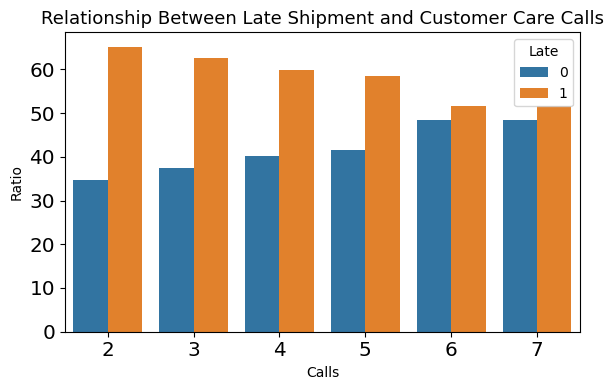

In [46]:
df_Calls1 = df.groupby(['Calls', 'Late']).agg({'ID': 'count'}).reset_index().rename(columns={'ID': 'Jumlah x'})
df_Calls2 = df.groupby(['Calls']).agg({'ID': 'count'}).reset_index().rename(columns={'ID': 'Jumlah y'})
df_Calls= df_Calls1.merge(df_Calls2,
                              left_on = ['Calls'],
                              right_on = ['Calls'],
                              how = 'inner')
df_Calls['Ratio'] = np.round(df_Calls['Jumlah x']*100 / df_Calls['Jumlah y'], 2)

print("To visualize the correlation between customer calls and late shipments, take a look at the barplot below:")
plt.figure(figsize=(6,4))
sns.barplot(x='Calls', y ='Ratio', data = df_Calls, hue='Late')
plt.title('Relationship Between Late Shipment and Customer Care Calls', fontsize=13)
plt.tight_layout()

Based on the data above, it is found that the more customer calls that occur, the more deliveries that arrive on time and the less deliveries that arrive late.

<b> End of the Source Code <b>

In [39]:
df.groupby(['Late','Calls']).count()

ID  Warehouse  Shipment  Rating  Cost  Prior_purchases  \
Late Calls                                                             
0    2       222        222       222     222   222              222   
     3      1206       1206      1206    1206  1206             1206   
     4      1431       1431      1431    1431  1431             1431   
     5       968        968       968     968   968              968   
     6       490        490       490     490   490              490   
     7       119        119       119     119   119              119   
1    2       416        416       416     416   416              416   
     3      2011       2011      2011    2011  2011             2011   
     4      2126       2126      2126    2126  2126             2126   
     5      1360       1360      1360    1360  1360             1360   
     6       523        523       523     523   523              523   
     7       127        127       127     127   127              127   

            Importance  Gender  Discount  Weight_gram  
Late Calls                                             
0    2             222     222       222          222  
     3            1206    1206      1206         1206  
     4            1431    1431      1431         1431  
     5             968     968       968          968  
     6             490     490       490          490  
     7             119     119       119          119  
1    2             416     416       416          416  
     3            2011    2011      2011         2011  
     4            2126    2126      2126         2126  
     5            1360    1360      1360         1360  
     6             523     523       523          523  
     7             127     127       127          127